# Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from patsy.builtins import *
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# READ DATA
gdp_le_df = pd.read_csv("../data/gdp_le.csv")

# DISPLAY THE TOP 5 ROWS
gdp_le_df.sort_values("Year").head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
5342,Uruguay,1990,11112.736405,South America,73.162000
4329,Seychelles,1990,15538.802834,Africa,68.107317
904,Cabo Verde,1990,1816.024743,Africa,65.023000
3180,Mauritania,1990,4611.941187,Africa,59.770000
3307,Mongolia,1990,5030.073252,Asia,58.765000


## 1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.

In [3]:
# FIT AN ORDINARY LEASE SQUARES (OLS) MODEL
lm_le_yr = smf.ols(formula="Life_Expectancy ~ Year", data=gdp_le_df).fit()

### a. What coefficients do you get? Interpret the meaning of these coefficents.

In [4]:
# DISPLAY MODEL COEFFICIENTS
lm_le_yr.params

Intercept   -468.138140
Year           0.267722
dtype: float64

#### ANSWER: The intercept is predicting year 0 life expectancy -468 based on the data. The slope is 0.268 years.

b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [5]:
# REFIT THE DATA SO THAT THE MODEL STARTS AT 1990
lm_le_yr = smf.ols(formula="Life_Expectancy ~ I(Year-1990)", data=gdp_le_df).fit()

# DISPLAY MODEL COEFFICIENTS
lm_le_yr.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

#### ANSWER: The intercept is predicting year 1990 life expectancy 64 now. The slope is still 0.268 years. Now they are significant and make sense.

### c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?

In [6]:
# COPY YEAR AND LIFE_EXPECTANCY TO NEW DATAFRAME
le_yr_df = gdp_le_df[["Year", "Life_Expectancy"]].copy()

# ADD COLUMN OF FITTED VALUES
le_yr_df['lr_fitted'] = lm_le_yr.fittedvalues

# CALCULATE MEANS BY YEAR TO NEW DATAFRAME
le_yr_mean_df = le_yr_df.groupby("Year")[['Life_Expectancy', 'lr_fitted']].mean()

# CALCULATE DIFFERENCE BETWEEN DATA AND FITTED VALUES
le_yr_mean_df['diff'] = le_yr_mean_df['Life_Expectancy'] - le_yr_mean_df['lr_fitted']
le_yr_mean_df

,Life_Expectancy,lr_fitted,diff
Year,,,
1990,64.745253,64.628889,0.116363
1991,65.021276,64.896612,0.124665
1992,65.217845,65.164334,0.053512
1993,65.218031,65.432056,-0.214025
1994,65.339539,65.699778,-0.360239
1995,65.956224,65.967500,-0.011276
1996,66.200189,66.235222,-0.035033
1997,66.437280,66.502944,-0.065664
1998,66.556082,66.770666,-0.214584


In [7]:
print(f"ANSWER: The model is only off by {abs(le_yr_mean_df['diff'].mean())} on average")

ANSWER: The model is only off by 0.00264707759699065 on average


### d. Plot the actual values against your model's estimates for the mean life expectancy.

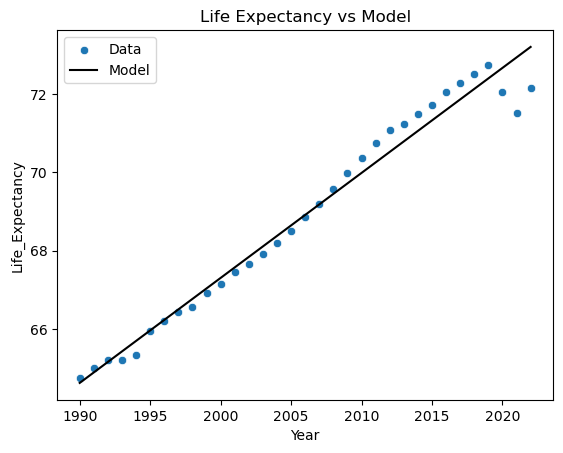

In [8]:
# CREATE LINE PLOT FOR DATA
ax = sns.scatterplot(data=le_yr_mean_df, x="Year", y="Life_Expectancy", label="Data")

# CREATE LINE PLOT FOR MODEL WITH PRIOR PLOT
sns.lineplot(data=le_yr_mean_df, x="Year", y="lr_fitted", ax=ax, label="Model", color="black")

# SET TITLE AND LEGEND
plt.title("Life Expectancy vs Model")
plt.legend();

e. Inspect the R-squared value for the model. does it make sense, given the plot?

In [9]:
print(f"""ANSWER: Even though the plot shows that the model means have little variance
from the actual data, the R-squared value {round(number=lm_le_yr.rsquared, ndigits=5)} means that the year is 
only {round(number=lm_le_yr.rsquared, ndigits=5) * 100}% of the determining factor in life expectancy.""")

ANSWER: Even though the plot shows that the model means have little variance
from the actual data, the R-squared value 0.07155 means that the year is 
only 7.155% of the determining factor in life expectancy.


## 2. Filter the full dataset down to just the year 2021.
Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.

In [10]:
# CREATE NEW DATASET
gdp_le_2021_df = gdp_le_df[gdp_le_df['Year'] == 2021].copy()

# FIT LINEAR REGRESSION MODEL
lm_gdp_le_2021 = smf.ols(formula="Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021_df).fit()

### a. What coefficients do you get?
Interpret the meaning of those coefficients.

In [11]:
# DISPLAY MODEL COEFFICIENTS
lm_gdp_le_2021.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

In [12]:
print(f"""ANSWER: Starting at {round(number=lm_gdp_le_2021.params.Intercept, ndigits=3)} years, the life expectancy
will increase by {round(number=lm_gdp_le_2021.params.GDP_Per_Capita, ndigits=5)} for every Per Capita unit increase.""")

ANSWER: Starting at 65.95 years, the life expectancy
will increase by 0.00026 for every Per Capita unit increase.


### b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor.
How does this change your coefficients?

In [13]:
# REFIT THE MODEL USING PATSY
lm_gdp_le_2021 = smf.ols(formula="Life_Expectancy ~ I(GDP_Per_Capita / 1000)", data=gdp_le_2021_df).fit()

# DISPLAY MODEL COEFFICIENTS
lm_gdp_le_2021.params

Intercept                   65.949870
I(GDP_Per_Capita / 1000)     0.256892
dtype: float64

In [14]:
print(f"The GDP_Per_Capita coefficient just increased by 1000: {lm_gdp_le_2021.params.iloc[1]}.")

The GDP_Per_Capita coefficient just increased by 1000: 0.2568917481806985.


### c. Are the coefficients statistically significant?

In [15]:
print(f"The coefficients are statistically significant based on the low p-value: {lm_gdp_le_2021.pvalues.iloc[1]}.")

The coefficients are statistically significant based on the low p-value: 6.810923113128574e-32.


### d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000?

What about one whose gdp per capita is $100,000?

In [16]:
print(f"ANSWER: $50k = {round(number=lm_gdp_le_2021.predict({"GDP_Per_Capita": 50000}).iloc[0], ndigits=3)} years.")

ANSWER: $50k = 78.794 years.


In [17]:
print(f"ANSWER: $100k = {round(number=lm_gdp_le_2021.predict({"GDP_Per_Capita": 100000}).iloc[0], ndigits=3)} years.")

ANSWER: $100k = 91.639 years.


### e. Plot the actual values compared to your model's estimates for mean life expectancy.
How would you assess the model's fit?

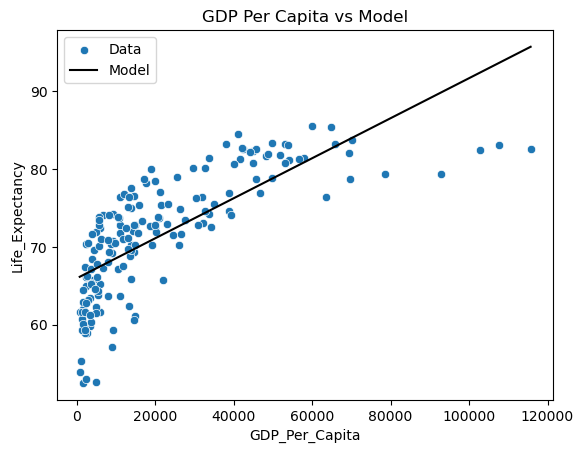

In [18]:
# ADD FITTED VALUES
gdp_le_2021_df['lr_fitted'] = lm_gdp_le_2021.fittedvalues

# CREATE PLOTS
ax = sns.scatterplot(data=gdp_le_2021_df, x="GDP_Per_Capita", y="Life_Expectancy", label="Data")
sns.lineplot(data=gdp_le_2021_df, x="GDP_Per_Capita", y="lr_fitted", ax=ax, color="black", label="Model")
plt.title(label="GDP Per Capita vs Model");

#### ANSWER: Not a great fit.

## 3. Now, fit a model for life expectancy based on the log of gdp per capita for 2021.

In [19]:
# CREATE NEW COLUMN TO STORE THE VALUE OF LOG BASE 2 OF GDP_Per_Capita
gdp_le_2021_df['gdp_log'] = gdp_le_2021_df['GDP_Per_Capita'].apply(func=math.log)

# DISPLAY THE TOP 5 ROWS
gdp_le_2021_df.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,lr_fitted,gdp_log
0,Afghanistan,2021,1517.016266,Asia,61.982,66.339579,7.324501
21,Albania,2021,14595.944386,Europe,76.463,69.699448,9.588499
54,Algeria,2021,11029.138782,Africa,76.377,68.783165,9.308296
87,Angola,2021,5911.835657,Africa,61.643,67.468572,8.684712
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,71.061985,9.898469


In [20]:
# FIT THE MODEL
lm_le_gdplog_2021 = smf.ols(formula="Life_Expectancy ~ gdp_log", data=gdp_le_2021_df).fit()

### a. Inspect the coefficients for this model.
Are they statistically significant?

In [21]:
# DISPLAY THE MODEL SUMMARY
lm_le_gdplog_2021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.06e-48
Time:                        20:09:55   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.9470      2.547      7.438      0.000      13.919      23.975
gdp_log        5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ANSWER: YES

### b. Interpret these coefficients.
What does the model estimate for the average life expectancy for countries with a gdp per capita of \$50,000?

In [22]:
print(f"""ANSWER: Starting at the intercept value {lm_le_gdplog_2021.params.Intercept}, the average life expectancy
will increase by {lm_le_gdplog_2021.params.gdp_log} for every unit increase of gdp_log.
For a country with a GDP per capita of $50,000, the model calculates the life expectancy will be 
{round(number=(lm_le_gdplog_2021.params.Intercept + lm_le_gdplog_2021.params.gdp_log * math.log(50000)), ndigits=3)} years.""")

ANSWER: Starting at the intercept value 18.94697006166019, the average life expectancy
will increase by 5.58901384805049 for every unit increase of gdp_log.
For a country with a GDP per capita of $50,000, the model calculates the life expectancy will be 
79.419 years.


What about for those with a gdp per capita of \$100,000?

In [23]:
print(f"""ANSWER: For a country with a GDP per capita of $100,000, the model calculates the life expectancy will be 
{round(number=(lm_le_gdplog_2021.params.Intercept + lm_le_gdplog_2021.params.gdp_log * math.log(100000)), ndigits=3)} years.""")

ANSWER: For a country with a GDP per capita of $100,000, the model calculates the life expectancy will be 
83.293 years.


### c. Plot the actual values compared to your models' estimates for the mean life expectancy.
How does this compare to the non-logged model?

In [24]:
# CREATE A NEW COLUMN FOR THE MODEL FITTED VALUES
gdp_le_2021_df['lr_fitted'] = lm_le_gdplog_2021.fittedvalues
gdp_le_2021_df.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,lr_fitted,gdp_log
0,Afghanistan,2021,1517.016266,Asia,61.982,59.883706,7.324501
21,Albania,2021,14595.944386,Europe,76.463,72.537224,9.588499
54,Algeria,2021,11029.138782,Africa,76.377,70.971165,9.308296
87,Angola,2021,5911.835657,Africa,61.643,67.485944,8.684712
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,74.269651,9.898469


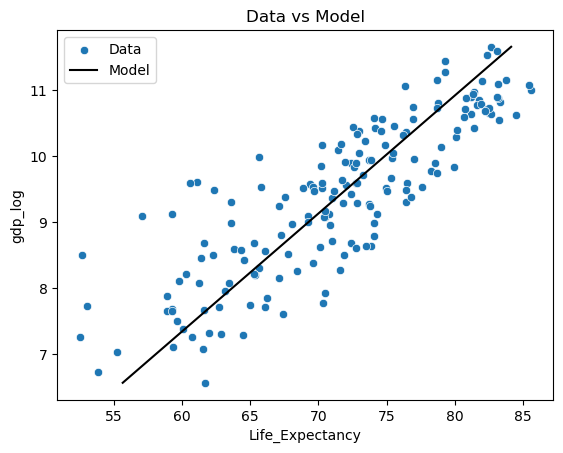

In [25]:
# CREATE A PLOT
ax = sns.scatterplot(data=gdp_le_2021_df, x="Life_Expectancy", y="gdp_log", label="Data")
sns.lineplot(data=gdp_le_2021_df, x="lr_fitted", y="gdp_log", ax=ax, label="Model", color="black")
plt.title(label="Data vs Model");

#### ANSWER: The log version of the model seems to be a better fit.

## 4. Finally, return to the full dataset.

In [26]:
# DISPLAY THE TOP 5 ROWS
gdp_le_df.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


### a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.

In [27]:
# CREATE A NEW COLUMN TO STORE THE LOG BASE 2 OF GDP_Per_Capita
gdp_le_df['gdp_log'] = gdp_le_df['GDP_Per_Capita'].apply(func=math.log)

# DISPLAY THE TOP 5 ROWS
gdp_le_df.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,gdp_log
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
1,Afghanistan,2020,1968.341002,Asia,62.575,7.584946
2,Afghanistan,2019,2079.921861,Asia,63.565,7.640086
3,Afghanistan,2018,2060.698973,Asia,63.081,7.630801
4,Afghanistan,2017,2096.093111,Asia,63.016,7.647830


In [28]:
# FIT AN ORDINARY LEASE SQUARES (OLS) MODEL
lm_le_gdplog = smf.ols(formula="Life_Expectancy ~ gdp_log", data=gdp_le_df).fit()

# DISPLAY MODEL COEFFICIENTS
lm_le_gdplog.params

Intercept    9.194102
gdp_log      6.531130
dtype: float64

### b. Then, add the year variable to your model.
How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?

In [44]:
# FIT AN ORDINARY LEASE SQUARES (OLS) MODEL
lm_le_gdplog_yr = smf.ols(formula="Life_Expectancy ~ gdp_log + I(Year-1990)", data=gdp_le_df).fit()

# DISPLAY MODEL COEFFICIENTS
lm_le_gdplog_yr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     7014.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:23:22   Log-Likelihood:                -16668.
No. Observations:                5504   AIC:                         3.334e+04
Df Residuals:                    5501   BIC:                         3.336e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.5612      0.517     16.563      0.000       7.548       9.574
gdp_log            6.3599      0.057    112.387      0.000       6.249       6.471
I(Year - 1990)     0.1345      0.007     18.525      0.000       0.120       0.149
==============================================================================
Omnibus:                     1096.440   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2582.760
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                       5.506   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
print(f"""ANSWER: For this model, to estimate the life expectancy, 
the product of the year and coefficient are added to the formula:
Life_Expectancy = {lm_le_gdplog_yr.params.loc['Intercept']} + {lm_le_gdplog_yr.params.loc['gdp_log']}(gdp_log) + {lm_le_gdplog_yr.params.loc['I(Year - 1990)']}(Year)
According to the p-value, the year is also statistically significant.""")

ANSWER: For this model, to estimate the life expectancy, 
the product of the year and coefficient are added to the formula:
Life_Expectancy = 8.56115056698396 + 6.359935902256439(gdp_log) + 0.13448671160624376(Year)
According to the p-value, the year is also statistically significant.
